### news dataset analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
news_df = pd.read_json("data/news.jsonl", lines=True)

#### Checking value counts and values for normalisation. 
#### Classifying on too many categories is not a wise idea as the model might fail to learn certain categories due to their frequency.
#### Best to identify categories and merge so that total frequency for a single "topic" can be higher.
#### Here topic is basically representation of multiple categories with one merged category

In [3]:
news_df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [4]:
# Apply the category normalization as discussed earlier

# 1. Combine "GREEN" and "ENVIRONMENT" into "ENVIRONMENT"
news_df['category'] = news_df['category'].replace(['GREEN', 'ENVIRONMENT'], 'ENVIRONMENT')

# 2. Combine "QUEER VOICES", "BLACK VOICES", and "LATINO VOICES" into "DIVERSE VOICES"
news_df['category'] = news_df['category'].replace(['QUEER VOICES', 'BLACK VOICES', 'LATINO VOICES'], 'DIVERSE VOICES')

# 3. Combine "WORLDPOST" and "THE WORLDPOST" into "WORLD NEWS"
news_df['category'] = news_df['category'].replace(['WORLDPOST', 'THE WORLDPOST'], 'WORLD NEWS')

# 4. Combine "PARENTING" and "PARENTS" into "PARENTING"
news_df['category'] = news_df['category'].replace(['PARENTING', 'PARENTS'], 'PARENTING')

# 5. Combine "ARTS", "ARTS & CULTURE", and "CULTURE & ARTS" into "ARTS & CULTURE"
news_df['category'] = news_df['category'].replace(['ARTS', 'ARTS & CULTURE', 'CULTURE & ARTS'], 'ARTS & CULTURE')

# 6. Combine "TECH" and "SCIENCE" into "TECH & SCIENCE"
news_df['category'] = news_df['category'].replace(['TECH', 'SCIENCE'], 'TECH & SCIENCE')

# 7. Combine "TASTE" and "FOOD & DRINK" into "FOOD & DRINK"
news_df['category'] = news_df['category'].replace(['TASTE', 'FOOD & DRINK'], 'FOOD & DRINK')

# 8. Combine "MONEY", "BUSINESS" into "BUSINESS & FINANCE"
news_df['category'] = news_df['category'].replace(['MONEY', 'BUSINESS'], 'BUSINESS & FINANCE')

# 9. Combine "COLLEGE", "EDUCATION" into "EDUCATION"
news_df['category'] = news_df['category'].replace(['COLLEGE', 'EDUCATION'], 'EDUCATION')

# 10. Combine "STYLE", "STYLE AND BEAUTY" into "STYLE & BEAUTY"
news_df['category'] = news_df['category'].replace(['STYLE', 'STYLE & BEAUTY', 'STYLE AND BEAUTY'], 'STYLE & BEAUTY')

# 11. Combine "GREEN" and "ENVIRONMENT" into "ENVIRONMENT"
news_df['category'] = news_df['category'].replace(['WELNNESS', 'HEALTHY LIVING'], 'ENVIRONMENT')


In [5]:
### Showing new categories
news_df.category.value_counts()

POLITICS              35602
WELLNESS              17945
ENTERTAINMENT         17362
PARENTING             12746
STYLE & BEAUTY        12068
DIVERSE VOICES        12060
TRAVEL                 9900
WORLD NEWS             9542
FOOD & DRINK           8436
BUSINESS & FINANCE     7748
HEALTHY LIVING         6694
COMEDY                 5400
SPORTS                 5077
HOME & LIVING          4320
TECH & SCIENCE         4310
ENVIRONMENT            4066
ARTS & CULTURE         3922
WEDDINGS               3653
WOMEN                  3572
CRIME                  3562
IMPACT                 3484
DIVORCE                3426
MEDIA                  2944
WEIRD NEWS             2777
RELIGION               2577
EDUCATION              2158
FIFTY                  1401
GOOD NEWS              1398
U.S. NEWS              1377
Name: category, dtype: int64

#### Analyzing headlines and short description as only one can be used:

In [ ]:
# Check for null in headlines and short descriptions
# Count of missing values
missing_headlines = news_df["headline"].isnull().sum()
missing_descriptions = news_df["short_description"].isnull().sum()
missing_headlines, missing_descriptions

In [ ]:
# As no NaNs or nulls are found checking for empty string
# Count of empty strings
empty_headlines = news_df[news_df["headline"] == ""].shape[0]
empty_descriptions = news_df[news_df["short_description"] == ""].shape[0]

# Distribution of string lengths for non-empty values
headline_lengths_non_empty = news_df[news_df["headline"] != ""]["headline"].apply(len)
description_lengths_non_empty = news_df[news_df["short_description"] != ""]["short_description"].apply(len)

headline_stats_non_empty = headline_lengths_non_empty.describe()
description_stats_non_empty = description_lengths_non_empty.describe()

empty_headlines, empty_descriptions, headline_stats_non_empty, description_stats_non_empty

In [ ]:
# Checking missing short descriptions by category
# Filter rows with empty short_description
empty_description_data = news_df[news_df["short_description"] == ""]

# Count of empty descriptions by category
empty_description_by_category = empty_description_data["category"].value_counts()

empty_description_by_category


### Final Analysis:
#### 1. Considering that we have missing values, and the problem looks even more exacerbated within larger categories, training on headlines would be a better method.
#### 2. US and world news category are mixed categories which will have data representing other categories. Therefore can be considered to be removed from the set and they should be trained as a secondary class or a classification between themseleves.

#### -------------------------------------------------------------------- 

## Query dataset analysis

In [6]:
import pandas as pd
fname ="./data/queries.json"
queries_df = pd.read_json(fname)
queries_df.head()

,question,query,col_names,col_names_original,has_join,has_groupby,has_orderby
0,In which year were most departments established?,SELECT creation FROM department GROUP BY creat...,"[*, department id, name, creation, ranking, bu...","[*, Department_ID, Name, Creation, Ranking, Bu...",False,True,True
1,List the official name and status of the city ...,"SELECT Official_Name , Status FROM city ORDER...","[*, city id, official name, status, area km 2,...","[*, City_ID, Official_Name, Status, Area_km_2,...",False,False,True
2,What is the official name and status of the ci...,"SELECT Official_Name , Status FROM city ORDER...","[*, city id, official name, status, area km 2,...","[*, City_ID, Official_Name, Status, Area_km_2,...",False,False,True
3,Show the status of the city that has hosted th...,SELECT T1.Status FROM city AS T1 JOIN farm_com...,"[*, city id, official name, status, area km 2,...","[*, City_ID, Official_Name, Status, Area_km_2,...",True,True,True
4,What is the status of the city that has hosted...,SELECT T1.Status FROM city AS T1 JOIN farm_com...,"[*, city id, official name, status, area km 2,...","[*, City_ID, Official_Name, Status, Area_km_2,...",True,True,True


### Analysing the below graph it seems the median value for group by questions is slightly higher than non group by questions. But there is similar variance across the groupby and non groupby questions. Length is not a great predictor.

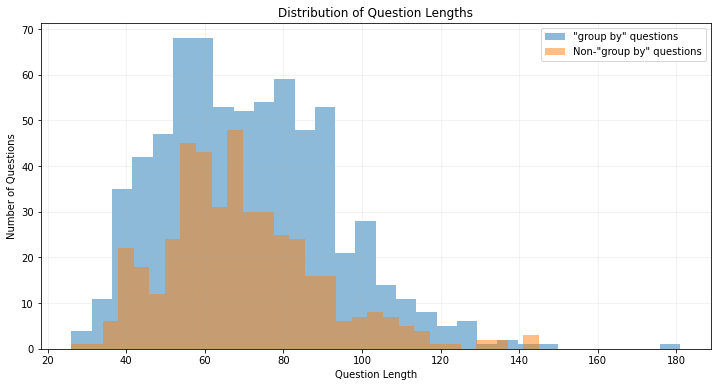

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the length of each question
queries_df['question_length'] = queries_df['question'].apply(len)

# Plotting the distribution of question lengths for questions with and without "group by"
plt.figure(figsize=(12, 6))

plt.hist(queries_df[queries_df['has_groupby'] == True]['question_length'], 
         bins=30, alpha=0.5, label='"group by" questions')
plt.hist(queries_df[queries_df['has_groupby'] == False]['question_length'], 
         bins=30, alpha=0.5, label='Non-"group by" questions')

plt.xlabel('Question Length')
plt.ylabel('Number of Questions')
plt.title('Distribution of Question Lengths')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()


### Analysing the common keywords, words like "highest", "largest" pop out which might imply sorting or filtering, but not necessarily grouping. 

In [8]:
from collections import Counter
import nltk

# Tokenize the questions and get the frequency of terms
def get_word_frequencies(df):
    words = []
    for question in df['question']:
        tokens = nltk.word_tokenize(question.lower())
        words.extend(tokens)
    return Counter(words)

# Get word frequencies for questions with and without "group by"
groupby_word_freq = get_word_frequencies(queries_df[queries_df['has_groupby']])
nogroupby_word_freq = get_word_frequencies(queries_df[~queries_df['has_groupby']])

# Get the top 20 most common words for each category
groupby_common = groupby_word_freq.most_common(20)
nogroupby_common = nogroupby_word_freq.most_common(20)

groupby_common, nogroupby_common

([('the', 1438),
  ('of', 621),
  ('most', 481),
  ('?', 425),
  ('.', 323),
  ('what', 279),
  ('is', 274),
  ('name', 254),
  ('number', 249),
  ('has', 216),
  ('and', 213),
  ('which', 184),
  ('that', 183),
  ('with', 155),
  ('id', 120),
  ('find', 119),
  ('in', 112),
  ('are', 83),
  ('who', 81),
  (',', 79)],
 [('the', 1084),
  ('of', 352),
  ('?', 257),
  ('what', 224),
  ('.', 196),
  ('name', 178),
  ('is', 175),
  ('with', 169),
  ('and', 136),
  ('most', 98),
  ('highest', 81),
  ('find', 76),
  ('that', 76),
  ('in', 76),
  ('who', 63),
  ('are', 62),
  ('has', 61),
  ('largest', 49),
  ('which', 49),
  ('id', 46)])

In [10]:
## Checking for data balance, the values don't seem too imbalanced
queries_df.has_groupby.value_counts()

True     693
False    438
Name: has_groupby, dtype: int64